## Burgers Equation - Strong Form in 2D
The strong form of the Burger's equation in 2-D for a scalar $u$, is:

Given  $\nu$, a constant that is kinematic viscosity, $L$, the length and $H$, the height of the domain, $\Omega = [0, L] \times [0, H]$, find $u: \Omega \times ]0,T[\mapsto R$, such that
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} + v \frac{\partial u}{\partial y} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right) \tag{0}
\end{equation}
and
\begin{equation}
\frac{\partial v}{\partial t} + u \frac{\partial v}{\partial x} + v \frac{\partial v}{\partial y} = \nu \; \left(\frac{\partial ^2 v}{\partial x^2} + \frac{\partial ^2 v}{\partial y^2}\right) \tag{1}
\end{equation}

Typically, the Burgers equation is solved as a system of two coupled equations for $u$ and $v$, where $u$ and $v$ are the velocity components in the $x$ and $y$ directions, respectively. However, in this implementation, we simplify the problem by considering only the $u$ component and setting $v = 0$. This assumption reduces the problem to a single equation.
\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} = \nu \; \left(\frac{\partial ^2 u}{\partial x^2} + \frac{\partial ^2 u}{\partial y^2}\right) \tag{2}
\end{equation}

subject to the following boundary conditions, and initial conditions:

1. Dirichlet boundary condition: $u = 4y(1 - y)$ on $\Gamma_{x=0} \times ]0,T[$
2. Dirichlet boundary condition: $u = 0$ on $\Gamma_{y=0} \cup \Gamma_{y=H} \times ]0,T[$
2. Neumann boundary condition: $-\nu \nabla u \cdot \mathbf{n} = 0$ on $\Gamma_{x=L} \times ]0,T[$
3. Initial condition $u(x, y, 0) = 0$

## Deriving the Galerkin weak form

Rearranging the terms,


\begin{equation}
\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \nu \nabla^{2} u = 0 \tag{3}
\end{equation}


Plugging the equation in a weighted integral and forcing it to 0,


\begin{equation}
\int w (\frac{\partial u}{\partial t} + u \frac{\partial u}{\partial x} - \nu \nabla^{2} u) d\Omega = 0 \tag{4}
\end{equation}


\begin{equation}
\int_{\Omega} w \frac{\partial u}{\partial t} d\Omega + \int_{\Omega} w u \frac{\partial u}{\partial x} d\Omega - \int_{\Omega} w \nu \nabla^{2} u d\Omega = 0 \tag{5}
\end{equation}


In the above equation, the last term has second order derivatives on $u$. We can apply integration by parts to take one derivative off of $u$, and put it on $w$.


\begin{equation}
\int_{\Omega} w \nu \nabla^{2} u d\Omega = \int_{\Gamma} w \nu \nabla u \cdot \mathbf{n} d\Gamma - \int_{\Omega} \nu \nabla w \cdot \nabla u d\Omega \tag{6}
\end{equation}


Plugging equation 6, back into equation 5,


\begin{equation}
\int_{\Omega} w \frac{\partial u}{\partial t} d\Omega + \int_{\Omega} w u \frac{\partial u}{\partial x} d\Omega + \nu \int_{\Omega} \nabla w \cdot \nabla u d\Omega - \nu \int_{\Gamma} w \nabla u \cdot \mathbf{n} d\Gamma = 0 \tag{7}
\end{equation}


Splitting the boundary integral over the four parts of the boundary

\begin{equation}
\nu \int_{\Gamma} w \nabla u \cdot \mathbf{n} d\Gamma = \nu \left(\int_{\Gamma_{x=0}} w \nabla u \cdot \mathbf{n} d\Gamma + \int_{\Gamma_{x=L}} w \nabla u \cdot \mathbf{n} d\Gamma + \int_{\Gamma_{y=0}} w \nabla u \cdot \mathbf{n} d\Gamma + \int_{\Gamma_{y=H}} w \nabla u \cdot \mathbf{n} d\Gamma\right) \tag{8}
\end{equation}

Since $u$ has essential boundary conditions prescribed on $\Gamma_{x=0}$, $\Gamma_{y=0}$, and $\Gamma_{y=H}$, we can choose the weight function $w$ from a space of functions $\mathcal{V}$, such that $w$ is zero on those parts of the boundary. Also, on $\Gamma_{x=L}$, we have a natural boundary condition. Therefore,
- The integral over $\Gamma_{x=0}$, $\Gamma_{y=0}$, and $\Gamma_{y=H}$ are zero because $w = 0$ on those boundaries.
- The integral over $\Gamma_{x=L}$ is zero because of the Neumann boundary condition

Thus,
\begin{equation}
\nu \int_{\Gamma} w \nabla u \cdot \mathbf{n} d\Gamma = 0 \tag{9}
\end{equation}

This leaves us with the following weak form:

Find $u \in \delta_{t}$, such that:

\begin{equation}
\int_{\Omega} w \frac{\partial u}{\partial t} d\Omega + \int_{\Omega} w u \frac{\partial u}{\partial x} d\Omega + \nu \int_{\Omega} \nabla w \cdot \nabla u d\Omega = 0 \tag{10}
\end{equation}

$\forall w \in \mathcal{V}$, where $\mathcal{V}$ is the space of test functions,

\begin{equation}
\mathcal{V}_{t} = \{ w(x,y,t) | w \in H^{1}(\Omega), w|_{\Gamma_{x=0} \cup \Gamma_{y=0} \cup \Gamma_{y=H}} = 0 \} \tag{11}
\end{equation}

and $\forall u \in \delta_{t}$, where $\delta_{t}$ is the space of trial functions that satisfy the essential boundary conditions.
\begin{equation}
\delta_{t} = \{ u(x,y,t) | u \in H^{1}(\Omega), u|_{\Gamma_{x=0}} = 4y(1 - y), u|_{\Gamma_{y=0} \cup \Gamma_{y=H}} = 0 \} \tag{12}
\end{equation}

Using the finite difference method for time discretization, we can approximate the time derivative using the trapezoidal rule as follows:

\begin{equation}
\frac{dy}{dt} = \mathbf{G}(y,t) \approx \frac{y_{n+1} - y_{n}}{\Delta t} \tag{13}
\end{equation}

\begin{equation}
y_{n+1} = y_n + \Delta t \cdot [(1 - \alpha) \mathbf{G}(y_n, t_n) + \alpha \mathbf{G}(y_{n+1}, t_{n+1})] \tag{14}
\end{equation}

, where $\alpha$ is a parameter that determines the specific time integration scheme (e.g., $\alpha = 0$ for explicit Euler, $\alpha = 1$ for implicit Euler, and $\alpha = 0.5$ for the Crank-Nicolson method).

As this is a nonlinear problem due to the convection term, we will solve it using the Newton method, which attempts to minimize the residual $F = LHS - RHS$.

\begin{equation}
F(u_{n+1}; w) =
\int_{\Omega} w \frac{u_{n+1} - u_n}{\Delta t} d\Omega +
(1-\alpha) \left(\int_{\Omega} w u_n \frac{\partial u_n}{\partial x} d\Omega + \nu \int_{\Omega} \nabla w \cdot \nabla u_n d\Omega\right) +
\alpha \left(\int_{\Omega} w u_{n+1} \frac{\partial u_{n+1}}{\partial x} d\Omega + \nu \int_{\Omega} \nabla w \cdot \nabla u_{n+1}  d\Omega\right) = 0 \tag{15}
\end{equation}


In [1]:
from mpi4py import MPI
from dolfinx import mesh, fem
from dolfinx.fem.petsc import NonlinearProblem
from dolfinx.io import VTXWriter
import ufl
import numpy as np

#----------------------------------#
# Spatial discretization parameters
#----------------------------------#
l_min = 0.0
l_max = 4.0
h_min = 0.0
h_max = 1.0
aspect = (l_max - l_min) / (h_max - h_min)

#-------------------------------#
# Temporal discretization parameters
#-------------------------------#
tspan = [0.0, 10.0]
num_steps = 100 # number of time steps

#-------------------------------#
# Physical parameters
#-------------------------------#
# kinematic viscosity
nu = 1.0e-3

#-------------------------------#
# Time integration parameter
#-------------------------------#
alpha = 1.0 # (explicit-euler=0.0, crank-nicolson=0.5, implicit-euler=1.0)

In [2]:
def burgers_2d_fem(l_min, l_max, h_min, h_max, nx, ny, tspan, num_steps, nu, alpha, save_solution=True):
    print(f"Mesh dimensions: nx={nx}, ny={ny}")
    # Create mesh for the domain [LMin, LMax] x [HMin, HMax] with nx and ny subdivisions.
    domain = mesh.create_rectangle(MPI.COMM_WORLD, [[l_min, h_min], [l_max, h_max]], [nx, ny])

    # Define a first-order Lagrange finite element function space on the mesh.
    V = fem.functionspace(domain, ("Lagrange", 1))

    # Inlet: Dirichlet boundary condition at x=0 (left edge of the domain).
    def inlet_boundary_condition(x):
        return 4 * x[1] * (1 - x[1])

    def inlet_boundary_facets(x):
        return np.isclose(x[0], 0.0)

    # Top and bottom: Dirichlet boundary condition at y=0 and y=H (bottom and top edges of the domain).
    def top_bottom_boundary_condition(x):
        return np.zeros_like(x[0])

    def top_bottom_boundary_facets(x):
        return np.isclose(x[1], 0.0) | np.isclose(x[1], h_max)

    u_inlet = fem.Function(V)
    u_inlet.interpolate(inlet_boundary_condition) # type: ignore
    # Locate inlet boundary facets and apply Dirichlet BC.
    inlet_facets = mesh.locate_entities_boundary(
        domain, dim=domain.topology.dim - 1, marker=inlet_boundary_facets)
    inlet_facets_dofs = fem.locate_dofs_topological(V=V, entity_dim=domain.topology.dim - 1, entities=inlet_facets)
    essential_bc_inlet = fem.dirichletbc(u_inlet, inlet_facets_dofs) # type: ignore

    # Locate top and bottom boundary facets and apply Dirichlet BC.
    u_top_bottom = fem.Function(V)
    u_top_bottom.interpolate(top_bottom_boundary_condition) # type: ignore
    top_bottom_facets = mesh.locate_entities_boundary(
        domain, dim=domain.topology.dim - 1, marker=top_bottom_boundary_facets)
    top_bottom_facets_dofs = fem.locate_dofs_topological(V=V, entity_dim=domain.topology.dim - 1, entities=top_bottom_facets)
    essential_bc_tb = fem.dirichletbc(u_top_bottom, top_bottom_facets_dofs) # type: ignore

    # Initial condition: u(x, y, 0) = 0 everywhere in the domain.
    def initial_condition(x):
        return np.zeros_like(x[0])

    # Solve the time-dependent Burgers' equation using implicit time stepping.
    dt = (tspan[1] - tspan[0]) / num_steps # time step size
    dV = ufl.dx(domain=domain)
    # dGamma = ufl.ds(domain=domain) # not used, useful for non-zero Neumann BCs
    w = ufl.TestFunction(V)

    # solution variable
    uh = fem.Function(V)
    uh.name = "u" # type: ignore
    uh.interpolate(initial_condition) # type: ignore

    # store the previous time step solution
    u_prev = fem.Function(V)
    u_prev.name = "u_prev" # type: ignore
    u_prev.interpolate(initial_condition) # type: ignore

    # u is the solution at u_{n+1}, and u_prev is the solution at u_{n}.
    # uh is the function we are solving for at the current time step.

    # Define the variational problem F(uh; w) = 0
    F = (w * (uh - u_prev) / dt * dV + # type: ignore
        alpha * (w * uh * uh.dx(0) * dV + nu * ufl.dot(ufl.grad(uh), ufl.grad(w)) * dV) + # type: ignore
        (1 - alpha) * (w * u_prev * u_prev.dx(0) * dV + nu * ufl.dot(ufl.grad(u_prev), ufl.grad(w)) * dV)) # type: ignore

    # Create nonlinear problem and Newton solver
    problem = NonlinearProblem(F, uh, bcs=[essential_bc_inlet, essential_bc_tb], petsc_options_prefix="burgers_") # type: ignore

    t = tspan[0]
    vtxwriter = None
    if save_solution:
        # Write mesh
        vtxwriter = VTXWriter(domain.comm, f"burgers_solution_{nx}x{ny}.bp", [uh])
        vtxwriter.write(t)
    # Time-stepping loop
    for i in range(num_steps):
        # Solve the nonlinear problem
        problem.solve()
        converged = problem.solver.getConvergedReason()
        num_iter = problem.solver.getIterationNumber()
        assert converged > 0, "Solver did not converge, got {converged}."
        # print(f"Solver converged after {num_iter} iterations with converged reason {converged}.")
        # Update solution
        uh.x.scatter_forward()
        # Update previous solution
        u_prev.x.array[:] = uh.x.array[:] # type: ignore
        # Update time
        t += dt
        if i % 10 == 0 or i == num_steps - 1:
            print(f"Time: {t:.4f}")
        if save_solution:
            # Write solution to file
            vtxwriter.write(t)
    if save_solution:
        vtxwriter.close()
    return uh


In [3]:
ny_values = [16, 32, 64, 128, 256]
ny = ny_values[-1]
nx = int(ny * aspect)
# Execute the solver with the finest mesh
uh_ex = burgers_2d_fem(l_min, l_max, h_min, h_max, nx, ny, tspan, num_steps, nu, alpha)

Mesh dimensions: nx=1024, ny=256
Time: 0.1000
Time: 1.1000
Time: 2.1000
Time: 3.1000
Time: 4.1000
Time: 5.1000
Time: 6.1000
Time: 7.1000
Time: 8.1000
Time: 9.1000
Time: 10.0000


Running simulation with nx=64, ny=16
Mesh dimensions: nx=64, ny=16
Time: 0.1000
Time: 1.1000
Time: 2.1000
Time: 3.1000
Time: 4.1000
Time: 5.1000
Time: 6.1000
Time: 7.1000
Time: 8.1000
Time: 9.1000
Time: 10.0000
Running simulation with nx=128, ny=32
Mesh dimensions: nx=128, ny=32
Time: 0.1000
Time: 1.1000
Time: 2.1000
Time: 3.1000
Time: 4.1000
Time: 5.1000
Time: 6.1000
Time: 7.1000
Time: 8.1000
Time: 9.1000
Time: 10.0000
Running simulation with nx=256, ny=64
Mesh dimensions: nx=256, ny=64
Time: 0.1000
Time: 1.1000
Time: 2.1000
Time: 3.1000
Time: 4.1000
Time: 5.1000
Time: 6.1000
Time: 7.1000
Time: 8.1000
Time: 9.1000
Time: 10.0000
Running simulation with nx=512, ny=128
Mesh dimensions: nx=512, ny=128
Time: 0.1000
Time: 1.1000
Time: 2.1000
Time: 3.1000
Time: 4.1000
Time: 5.1000
Time: 6.1000
Time: 7.1000
Time: 8.1000
Time: 9.1000
Time: 10.0000


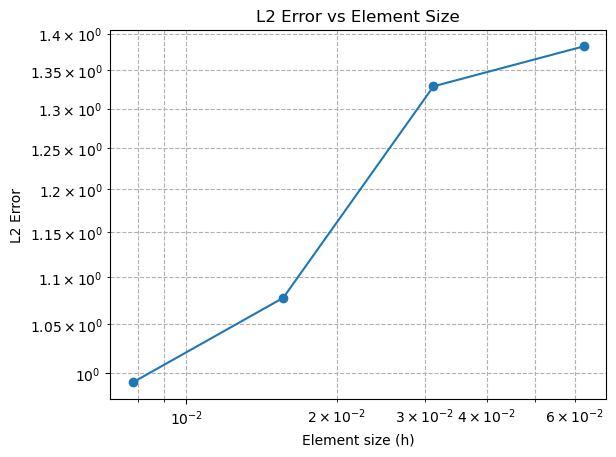

In [4]:
# This function computes the L2 error between the numerical solution uh and the exact solution u_ex.
# It does so by interpolating both solutions into a higher-order function space to improve accuracy.
# This code was adapted from https://jsdokken.com/dolfinx-tutorial/chapter4/convergence.html#reliable-error-norm-computation
def error_L2(uh, u_ex, degree_raise=3):
    # Create higher order function space
    degree = uh.function_space.ufl_element().degree
    family = uh.function_space.ufl_element().family_name
    mesh = uh.function_space.mesh
    W = fem.functionspace(mesh, (family, degree + degree_raise))
    # Interpolate approximate solution
    u_W = fem.Function(W)
    u_W.interpolate(uh)

    # Interpolate exact solution,
    u_ex_W = fem.Function(W)
    u_ex_W.interpolate(u_ex)

    # Compute the error in the higher order function space
    e_W = fem.Function(W)
    e_W.x.array[:] = u_W.x.array - u_ex_W.x.array

    # Integrate the error
    error = fem.form(ufl.inner(e_W, e_W) * ufl.dx(domain=mesh))
    error_local = fem.assemble_scalar(error)
    error_global = mesh.comm.allreduce(error_local, op=MPI.SUM)
    return np.sqrt(error_global)
errors = []
element_sizes = []
for ny in ny_values[:-1]: # skip the finest mesh used for the reference solution
    nx = int(ny * aspect)
    print(f"Running simulation with nx={nx}, ny={ny}")
    element_sizes.append((l_max - l_min) / nx)
    uh = burgers_2d_fem(l_min, l_max, h_min, h_max, nx, ny, tspan, num_steps, nu, alpha, save_solution=False)
    errors.append(error_L2(uh, uh_ex))
import matplotlib.pyplot as plt
plt.loglog(element_sizes, errors, marker='o')
plt.xlabel('Element size (h)')
plt.ylabel('L2 Error')
plt.title('L2 Error vs Element Size')
plt.grid(True, which="both", ls="--")
plt.show()